#  Machines (Active Learning) + Expert Annotation 
## (MULT-predicate document screening)

# OHSUMED-BASED SCREENING DATASET

As a classifier, we used Linear SVM with standard settings provided by scikit-learn, namely penalty=’l2’, loss=’squared_hinge’, C=GridSrarch, random_state=123, and class_weight=GridSrarch (to take into account unbalanced property of the data). LossRatio = 5

For handling unbalanced data, the undersampling of a majority class used. The lower bound of the proportion of positive class is set to 0.333. The x-axis is the "number of queried items". Note that this might not be the same as the number of training items since we want to keep the minimal proportion of positive items and therefore might not include some labeled items to the training set.

Results are based on 5-fold cross validation, p_out=0.7

In [2]:
import pandas as pd

%matplotlib inline  
import matplotlib.pyplot as plt

In [14]:
def plot_charts(df, metrics, algos, pred):
    fig, ax = plt.subplots(nrows=2, ncols=2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(20,12))
    x = df.loc[df['sampling_strategy'] == algos[0]]['num_items_queried'].values
    
    for i, m in zip([(0, 0), (0, 1), (1, 0), (1, 1)], metrics):
        for alg, c, l in zip(algos, ['m', 'b', 'black'], ['--', '-.', '-']):
            y = df.loc[df['sampling_strategy'] == alg][m+'_mean'].values
            y_std = df.loc[df['sampling_strategy'] == alg][m+'_std'].values
            ax[i].plot(x, y, label=alg, color=c, linestyle=l)
            ax[i].fill_between(x, y-y_std, y+y_std, alpha=0.05, color=c)
            ax[i].set_xlabel('number of queried items', size=14)
            ax[i].set_ylabel(m, size=14)
            ax[i].set_title('{} on predicates {}+{}'.format(m, pred[0],pred[1]), size=15)
        # clasifiers with all data
#         y_ = df.loc[df['sampling_strategy'] == 'all_training_data'][m+'_mean'].values[0]
#         ax[i].axhline(y=y_, linestyle=':', label='all_training_data')
        ax[i].legend( fontsize=14)
            
def plot(file_name, pred):
    plot_charts(pd.read_csv('../output/machines_and_experts/{}'.format(file_name)),
                ['loss', 'f_beta', 'precision', 'recall'], 
                ['uncertainty_sampling', 'random_sampling', 'objective_aware_sampling'],
                pred)

## Predicates C04 + C12
C14: Neoplasms <br>
C12: Urologic and Male Genital Diseases

The proportion of documents that describe C04+C14 is 1.6%, the total number of documents is 34.4k <br>

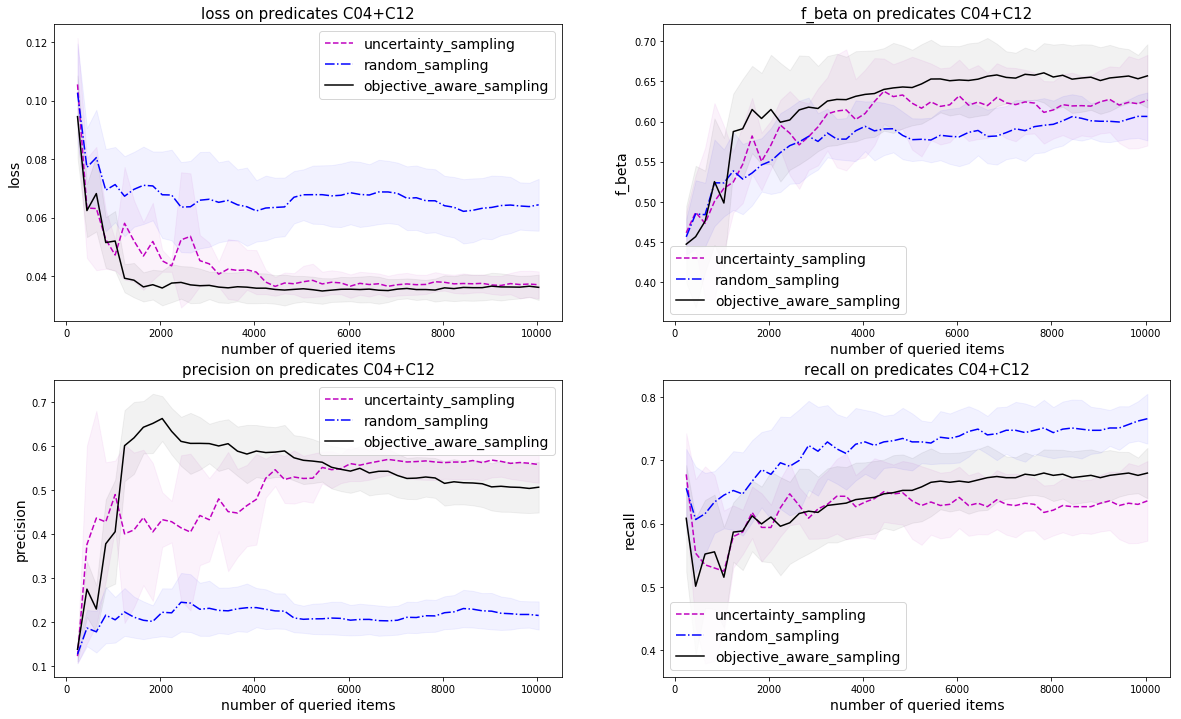

In [15]:
pred = ['C04', 'C12']
file_name = 'screening_al_C04_C12_lr5_smv_tr07_k5.csv'.format(pred[0], pred[1])
plot(file_name, pred)

# Predicates C10 + C23
C10: Nervous System Diseases  <br>
C23: Pathological Conditions, Signs and Symptoms (difficult predicate)

The proportion of documents that describe C10+C23 is 3.5%, the total number of documents is  34.4k<br>

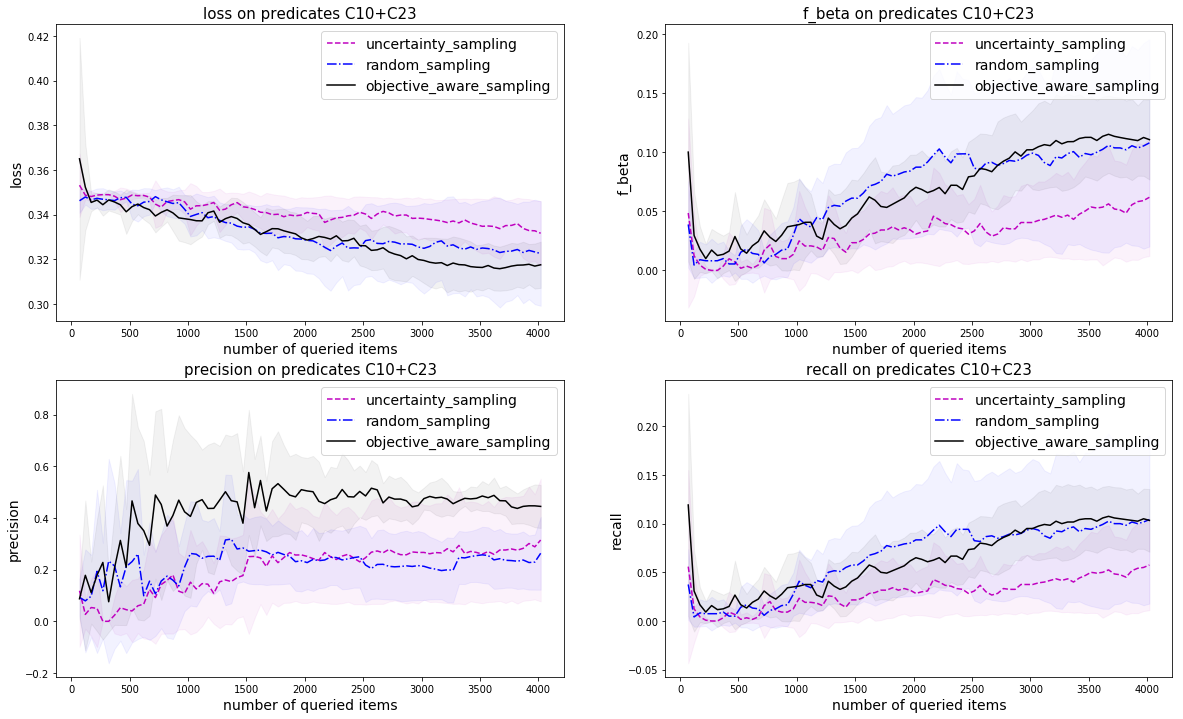

In [16]:
pred = ['C10', 'C23']
file_name = 'screening_al_{}_{}.csv'.format(pred[0], pred[1])
plot(file_name, pred)

# Predicates C14 + C23
C14: Cardiovascular Diseases <br>
C23: Pathological Conditions, Signs and Symptoms (difficult predicate)

The proportion of documents that describe C14+C23 is 5%, the total number of documents is  34.4k <br>

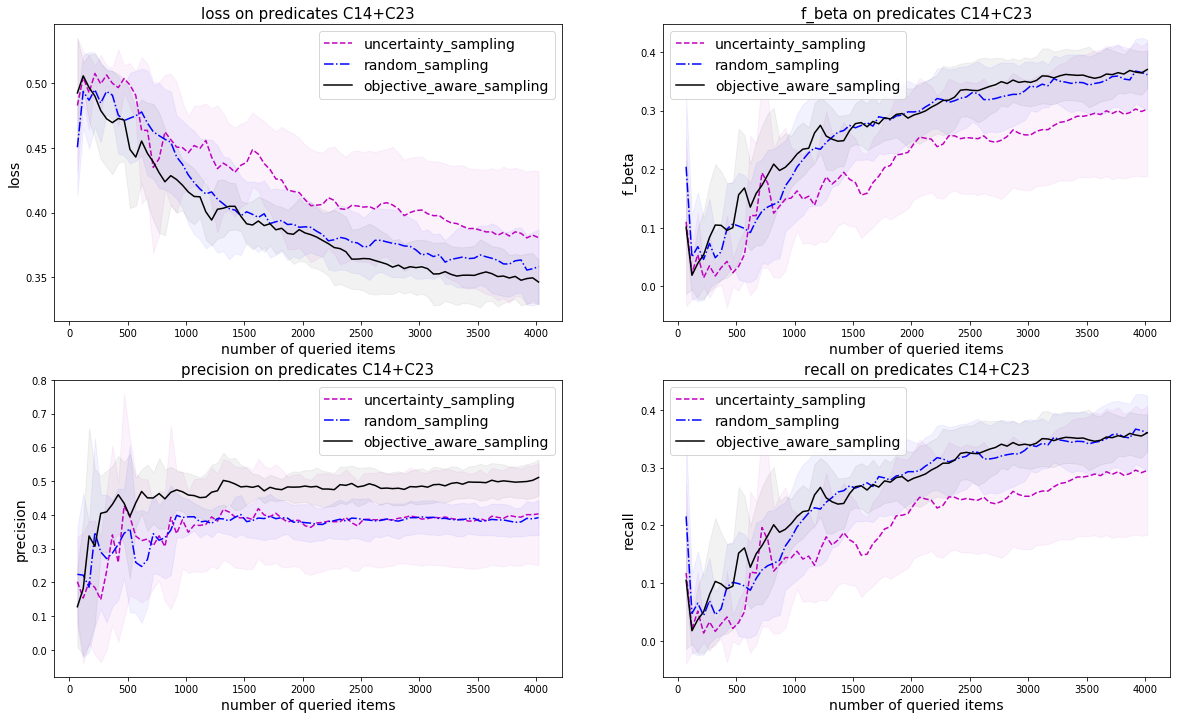

In [17]:
pred = ['C14', 'C23']
file_name = 'screening_al_{}_{}.csv'.format(pred[0], pred[1])
plot(file_name, pred)